# Exploratory data analysis of the Maternal Health Risk Data Set

In [42]:
#import the required packages
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

# Summary of the data set

The data set used in....

It was sourced from the UCI Machine Learning Repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set), specifically [this file](https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv)

In [19]:
#loading the data set
maternal_risk_df = pd.read_csv('../data/raw/maternal_risk.csv',header=1)

Before proceeding further, we will split the data such that 80% of observations are in the training and 20% of observations are in the test set.

In [20]:
#train_test_split
train_df, test_df = train_test_split(maternal_risk_df, test_size=0.20, random_state=123)

We also need to check that there are no null values in the data set.

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 375 to 510
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          811 non-null    int64  
 1   SystolicBP   811 non-null    int64  
 2   DiastolicBP  811 non-null    int64  
 3   BS           811 non-null    float64
 4   BodyTemp     811 non-null    float64
 5   HeartRate    811 non-null    int64  
 6   RiskLevel    811 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 50.7+ KB


Table 1. Number of non-null values for each column.

In [22]:
train_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,29.574599,112.933416,76.262639,8.659211,98.680641,74.373613
std,13.287246,18.334896,13.764557,3.223935,1.379661,7.908723
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,95.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,37.500000,120.000000,90.000000,7.950000,98.000000,80.000000
max,66.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Table 2. Statistics of each numeric columns.

Now we will explore the distribution of the classes(low risk, mid risk, high risk):

In [41]:
pd.DataFrame(train_df['RiskLevel'].value_counts()).rename(columns={'RiskLevel':'Count'})

,Count
low risk,325
mid risk,274
high risk,212


Table 3. Counts of observation for each class.

<AxesSubplot:>

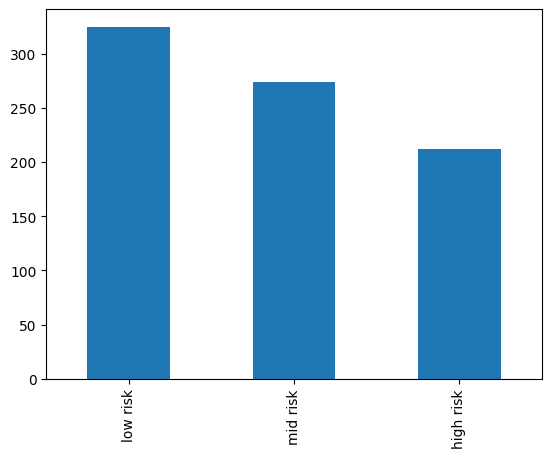

In [32]:
train_df['RiskLevel'].value_counts().plot(kind='bar')

Figure 1. Counts of observation for each class.

From the figure, we can see that there is a minor class imbalance, but it is not so great that immediate action needs to be taken. During hyperparameter optimization for improving model performance, we can further evaluate whether a balanced class weight will improve model performance or not.

# Exploratory analysis on the training data set

In [53]:
X_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [95]:
def display(i):
    graph = alt.Chart(train_df).transform_density(
    i,groupby=['RiskLevel'],
    as_=[ i, 'density']).mark_area(opacity=0.5).encode(
    x = (i),
    y='density:Q',color = 'RiskLevel').properties(width=200,height=200)
    return graph

In [96]:
Age = display('Age')
SystolicBP = display('SystolicBP')
DiastolicBP = display('DiastolicBP')
BS = display('BS')
Age = display('BodyTemp')
HeartRate = display('HeartRate')

To see whether the predictors might be useful to predict the risk level, we plotted the distributions of each predictor from the training data and coloured the distribution by class (high risk: blue, mid risk: red and low risk: orange). 

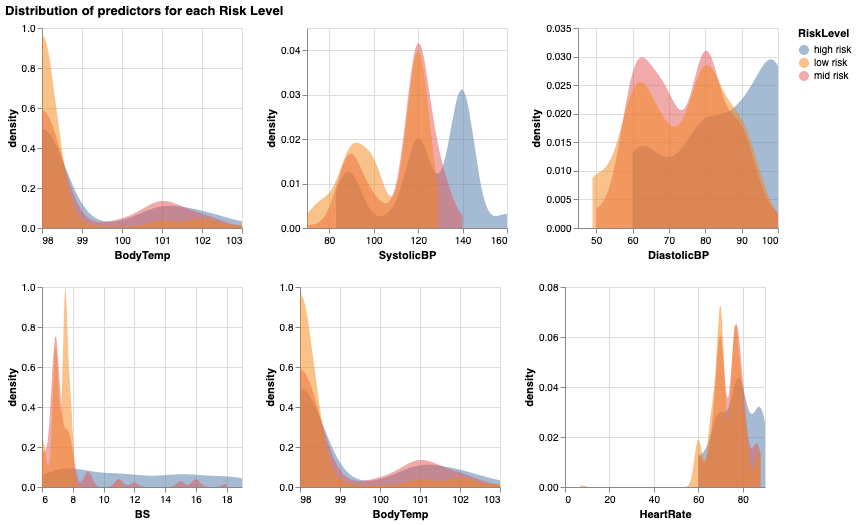

In [97]:
((Age | SystolicBP | DiastolicBP) & (BS | Age | HeartRate)).properties(title='Distribution of predictors for each Risk Level')

Figure 2.  Distribution of training set predictors for high risk, mid risk and low risk

### Explanation needed

To explore whether there is any interesting relationship between the predictors, we have plotted a pairwise scatter plots for all the predictors.

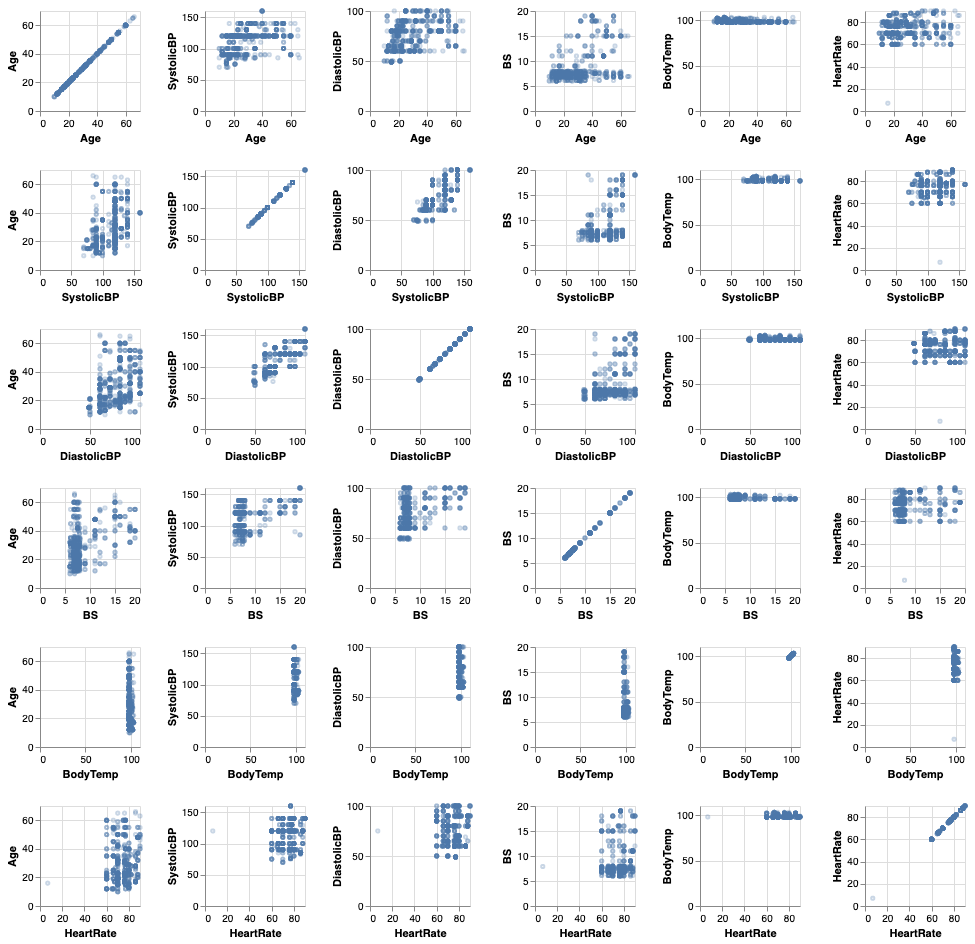

In [99]:
alt.Chart(train_df).mark_point(opacity=0.3, size=10).encode(
     alt.X(alt.repeat('row'), type='quantitative'),
     alt.Y(alt.repeat('column'), type='quantitative')
).properties(
    width=100,
    height=100
).repeat(
    column=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
    row=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
)

Figure 3. Pairwise relationship between predictors.

### Explanation needed

# References

Dua, Dheeru, and Casey Graff. 2017. “UCI Machine Learning Repository.” University of California, Irvine, School of Information; Computer Sciences. http://archive.ics.uci.edu/ml.